In [5]:
import numpy as np
from statsmodels.tsa.ar_model import AR, ARResults
from statsmodels.graphics.tsaplots import plot_pacf

### Model: 
$y(n) = 2 + .8y(n-1) - .5y(n-2) + .3y(n-3) - .2y(n-4) + .1y(n-5) + $noise$(n)$ 

$y(0) = 2$

AR(0)
Lag:1
Coeffs: [2.92950811 0.39959047]
AR(1)
Lag:2
Coeffs: [ 3.43214439  0.61820094 -0.32453747]
AR(2)
Lag:3
Coeffs: [ 2.85500286  0.75328598 -0.60124211  0.26258486]
AR(3)
Lag:4
Coeffs: [ 2.76285742  0.80106039 -0.68214386  0.40824792 -0.09470128]
AR(4)
Lag:5
Coeffs: [ 1.86492845  0.80694064 -0.72015349  0.5091369  -0.14726477  0.16933368]


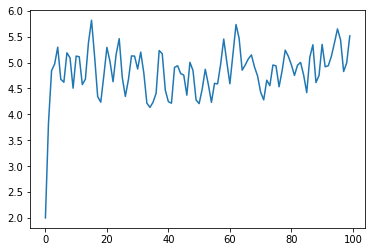

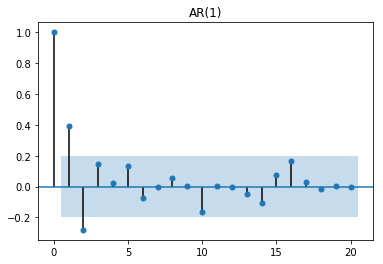

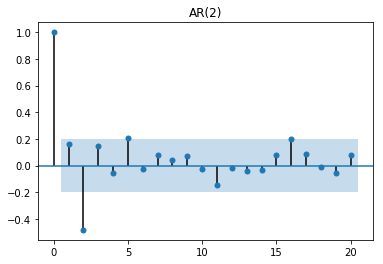

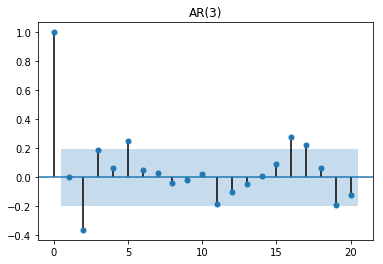

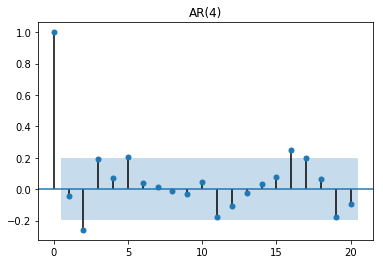

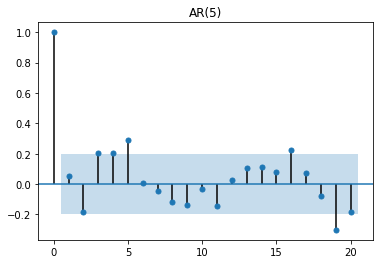

In [6]:
import matplotlib.pyplot as plt
wn = np.random.random
params = [2, .8, -.5, .3, -.2, .1]
samples=100
y = [2]
y.append(params[0]+params[1]*y[0]+wn())
y.append(params[0]+params[1]*y[1]+params[2]*y[0]+wn())
y.append(params[0]+params[1]*y[2]+params[2]*y[1]+params[3]*y[0]+wn())
y.append(params[0]+params[1]*y[3]+params[2]*y[2]+params[3]*y[1]+params[4]*y[0]+wn())
y.append(params[0]+params[1]*y[4]+params[2]*y[3]+params[3]*y[2]+params[4]*y[1]+params[5]*y[0]+wn())
for i in range(samples-6):
    tail = len(y)
    y.append(params[0]
             +params[1]*y[tail-1]
             +params[2]*y[tail-2]
             +params[3]*y[tail-3]
             +params[4]*y[tail-4]
             +params[5]*y[tail-5] + wn())
plt.plot(y)

models = []
for i in range(1,6):
    model=AR(y)
    ARfit=model.fit(maxlag=i, method='cmle') #was getting convergence warnings with mle, improved fitting a bit as well
    models.append(ARfit)

for i in range(5):
    plot_pacf(models[i].predict(end=samples, dynamic=False), title=f'AR({i+1})')
    print(f'================================================\nAR({i})')
    print(f'Lag:{models[i].k_ar}\nCoeffs: {models[i].params}\n================================================')
    
